# Lead Scoring

In [20]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA UNDERSTANDING

In [21]:
lead = pd.read_csv('C:/Users/amurugesan/AppData/Local/Temp/Temp1_Lead+Scoring+Case+Study.zip/Lead Scoring Assignment/Leads.csv')
lead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [22]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [23]:
print(lead.shape)

(9240, 37)


In [24]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [25]:
print(lead.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


### DATA CLEANING

In [26]:
# Some of the fields that are not selected by the customer is filled as 'Select'.
# Since this is equivalent to unknown, we will replace this value with NaN.
lead = lead.replace('Select',np.nan)

In [27]:
# Now we will check the count of NULL values
print(lead.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [28]:
# We will now drop the columns having more than 30% NA values.
lead=lead.drop(lead.loc[:,list(lead.isnull().sum() > (.30*len(lead)))].columns , 1)
print(lead.shape)

(9240, 27)


In [29]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [30]:
# We have removed columns:
# 'City', 'Asymmetrique Activity Index',
# 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
# 'Asymmetrique Profile Score','Lead Profile','Specialization', 'How did you hear about X Education',
# 'Tags', 'Lead Quality'  because they have more than 30% of NaN values.

In [31]:
# Checking the percentage of missing values
print(round(100*(lead.isnull().sum()/len(lead.index)), 2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [32]:
# What is your current occupation                  29.11
# What matters most to you in choosing a course    29.32

### Treating the missing values

In [33]:
# What matters most to you in choosing a course:
print(lead['What matters most to you in choosing a course'].value_counts())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


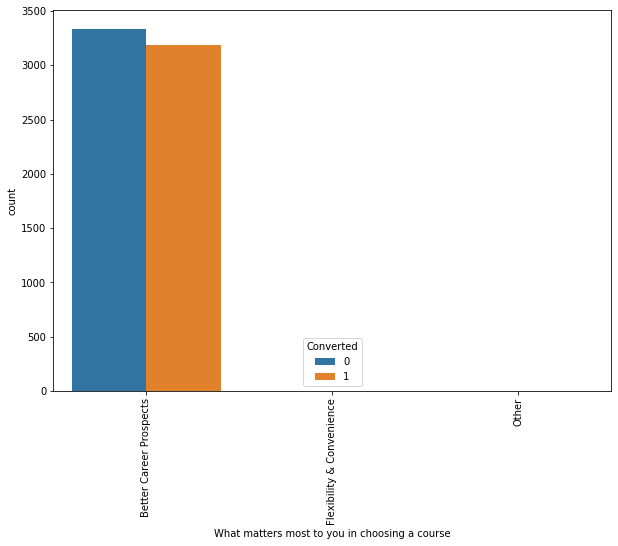

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(lead['What matters most to you in choosing a course'], hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [35]:
# Since we see that 'What matters most to you in choosing a course' is almost equal to 30% and has value='Better Career Prospects' in almost all cases.
# This will not add much information to the model
# Therefore dropping the feature 'What matters most to you in choosing a course'.
lead=lead.drop(['What matters most to you in choosing a course'],axis=1)

In [36]:
# What is your current occupation:

# We will impute the NULL values in 'What is your current occupation '.
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

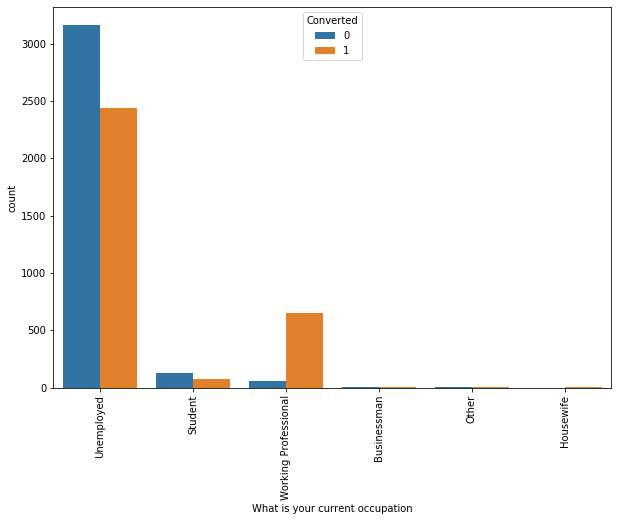

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(lead['What is your current occupation'], hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [38]:
# Since the maximum value count is for 'Unemployed', we will impute the NULL values with 'Unemployed'
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')
print(lead['What is your current occupation'].value_counts())

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [39]:
# Country

# We will impute the NULL values in 'Country'.
print(lead['Country'].value_counts())

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Belgium                    2
Italy                      2
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
China                      2
Bangladesh                 2
Ghana                      2
Philippines                2
Switzerland                1
Liberia                    1
Denmark                    1
Sri Lanka                  1
Vietnam                    1
Kenya                      1
Russia        

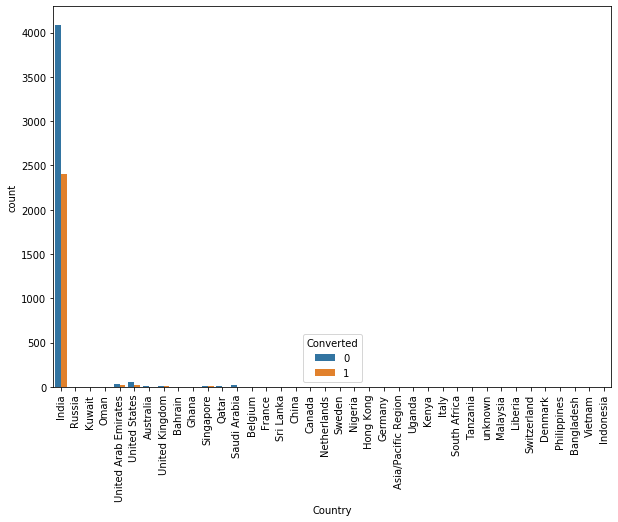

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(lead['Country'], hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [41]:
# We see that 'India' has the maximum entries.
# We also see an entry 'unknown'
# Replacing the NaN values and 'unknown' values with 'India'.
lead['Country']=lead['Country'].replace(['unknown',np.nan],'India')

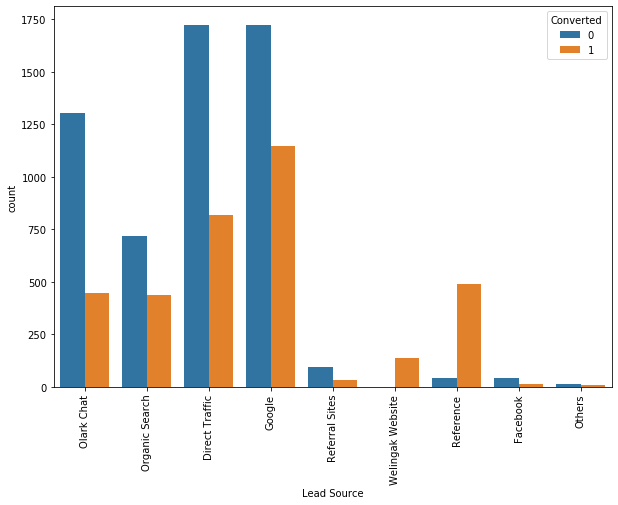

In [42]:
# Lead Sourcing:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                                                   'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')
plt.figure(figsize=(10,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

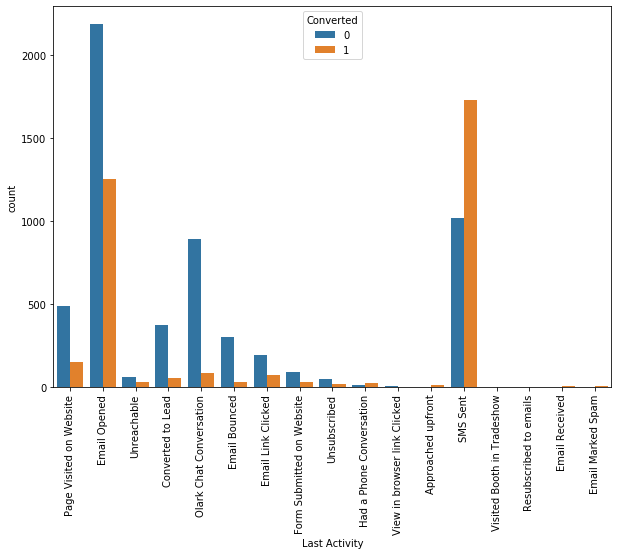

In [43]:
# Last Activity:
plt.figure(figsize=(10,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [44]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

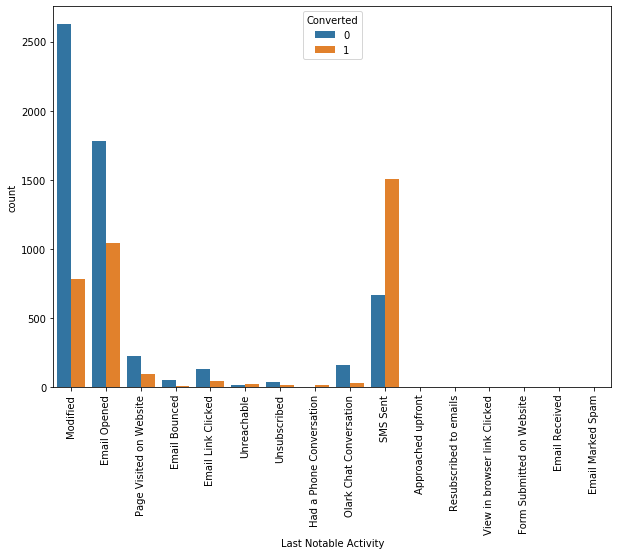

In [45]:
# Last Notable Activity
plt.figure(figsize=(10,7))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

In [46]:
# Checking the percentage of missing values
print(round(100*(lead.isnull().sum()/len(lead.index)), 2))

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [47]:
# Now we see that all the features have less that 2% missing values.
# Hence dropping the rows with missing values.

lead.dropna(inplace = True)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [48]:
# Now we will the check for data information.
print(lead.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [49]:
# Duplicate column information
# Column: Prospect ID gives the same information as 'Lead Number'
# Hence we can drop 'Prospect ID'.
# Column: Last Notable Activity gives the same information as 'Last Activity'
# Hence we can drop 'Last Notable Activity'.

In [50]:
print(lead['Update me on Supply Chain Content'].value_counts())
print(lead['Get updates on DM Content'].value_counts())
print(lead['I agree to pay the amount through cheque'].value_counts())
print(lead['Do Not Email'].value_counts())
print(lead['Do Not Call'].value_counts())
print(lead['Search'].value_counts())
print(lead['Magazine'].value_counts())
print(lead['Newspaper Article'].value_counts())
print(lead['X Education Forums'].value_counts())
print(lead['Newspaper'].value_counts())
print(lead['Digital Advertisement'].value_counts())
print(lead['Through Recommendations'].value_counts())
print(lead['Receive More Updates About Our Courses'].value_counts())

No    9074
Name: Update me on Supply Chain Content, dtype: int64
No    9074
Name: Get updates on DM Content, dtype: int64
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
No     9060
Yes      14
Name: Search, dtype: int64
No    9074
Name: Magazine, dtype: int64
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     9073
Yes       1
Name: X Education Forums, dtype: int64
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
No    9074
Name: Receive More Updates About Our Courses, dtype: int64


In [51]:
# All the above features gives us no information as they have >95% filled with a single value
# Hence we can drop these columns
lead= lead.drop(columns=['Prospect ID','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                         'Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
                         'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                         'Receive More Updates About Our Courses','Last Notable Activity'])
lead.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,No
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unemployed,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Student,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Unemployed,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No


In [52]:
print(lead.columns)

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')


In [53]:
# Converting Yes to 1 and No to 0
lead['A free copy of Mastering The Interview']=lead['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})
lead['A free copy of Mastering The Interview']

0       0
1       0
2       1
3       0
4       0
       ..
9235    0
9236    1
9237    1
9238    0
9239    1
Name: A free copy of Mastering The Interview, Length: 9074, dtype: int64

In [54]:
# Creating dummy variables for categorical variables
Cat_dum=pd.get_dummies(lead['Last Activity'],prefix='Last Activity',drop_first=True)
lead=pd.concat([lead,Cat_dum],axis=1)
Cat_dum=pd.get_dummies(lead['Lead Origin'],prefix='Lead Origin',drop_first=True)
lead=pd.concat([lead,Cat_dum],axis=1)

Cat_dum=pd.get_dummies(lead['Lead Source'],prefix='Lead Source',drop_first=True)
lead=pd.concat([lead,Cat_dum],axis=1)
Cat_dum=pd.get_dummies(lead['Country'],prefix='Country',drop_first=True)
lead=pd.concat([lead,Cat_dum],axis=1)

Cat_dum=pd.get_dummies(lead['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
lead=pd.concat([lead,Cat_dum],axis=1)

In [55]:
# Removing the original columns, after dummy conversion
lead = lead.drop(['Lead Origin','Lead Source','Last Activity',
                    'What is your current occupation','Country'],axis = 1)

(lead.columns)

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_Australia', 'Country_Bahrain', 'Country_Bangladesh',
       'Country_Belgium', 'Country_Canada', 'Country_China', 'C

In [56]:
print(lead.shape)

(9074, 68)


In [57]:
lead.info

<bound method DataFrame.info of       Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0          660737          0          0.0                            0   
1          660728          0          5.0                          674   
2          660727          1          2.0                         1532   
3          660719          0          1.0                          305   
4          660681          1          2.0                         1428   
...           ...        ...          ...                          ...   
9235       579564          1          8.0                         1845   
9236       579546          0          2.0                          238   
9237       579545          0          2.0                          199   
9238       579538          1          3.0                          499   
9239       579533          1          6.0                         1279   

      Page Views Per Visit  A free copy of Mastering The Interview  \
0        

In [58]:
# OUTLIER TREATMENT:
# Checking for outliers in the continuous variables
cat_leads =lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
cat_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [59]:
# Removing the outlier
Q1 = lead['Page Views Per Visit'].quantile(0.25)
Q3 = lead['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead=lead.loc[(lead['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

Q1 = lead['TotalVisits'].quantile(0.25)
Q3 = lead['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
lead=lead.loc[(lead['TotalVisits'] >= Q1 - 1.5*IQR) & (lead['TotalVisits'] <= Q3 + 1.5*IQR)]

lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,...,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,660681,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
print(lead.shape)

(8235, 68)


# MODEL BUILDING:
# TRAIN-TEST SPLIT

In [61]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [62]:
# Moving Target variable to Y
y=lead['Converted']
# Keeping only the features in X, hence dropping 'Lead Number'.
X=lead.drop(['Lead Number','Converted'],axis=1)
(X.head())

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,...,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting the data into train and test

In [63]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


from sklearn.preprocessing import StandardScaler

#scaling continuous variables in the dataset
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
(X_train.columns)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_Australia', 'Country_Bahrain', 'Country_Bangladesh',
       'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark',
       'Country_Fr

In [64]:
print(lead.shape)

(8235, 68)



### Checking the Lead Conversion Rate

In [65]:
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
print(converted)

37.207043108682456


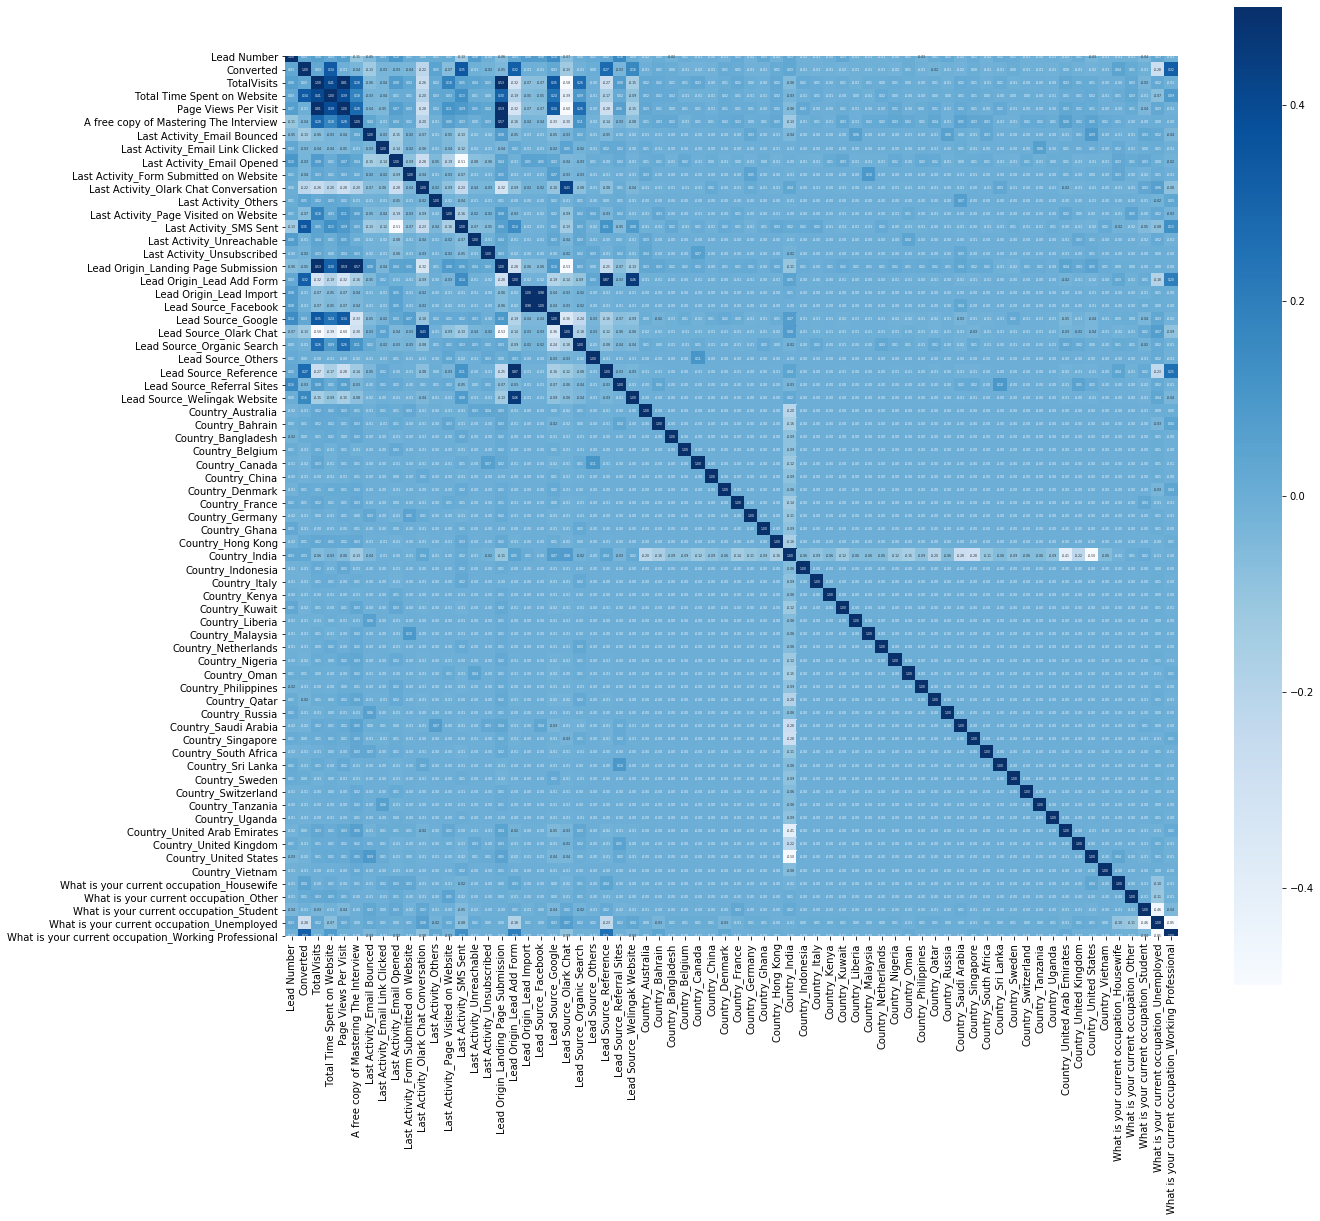

In [66]:
# Let's see the correlation matrix
plt.figure(figsize = (20,18)) # Size of the figure
sns.heatmap(lead.corr(),cbar=True, vmin=-0.5, vmax=0.5,fmt='.2f', annot_kws={'size': 3}, annot=True,square=True, cmap=plt.cm.Blues)
plt.show()

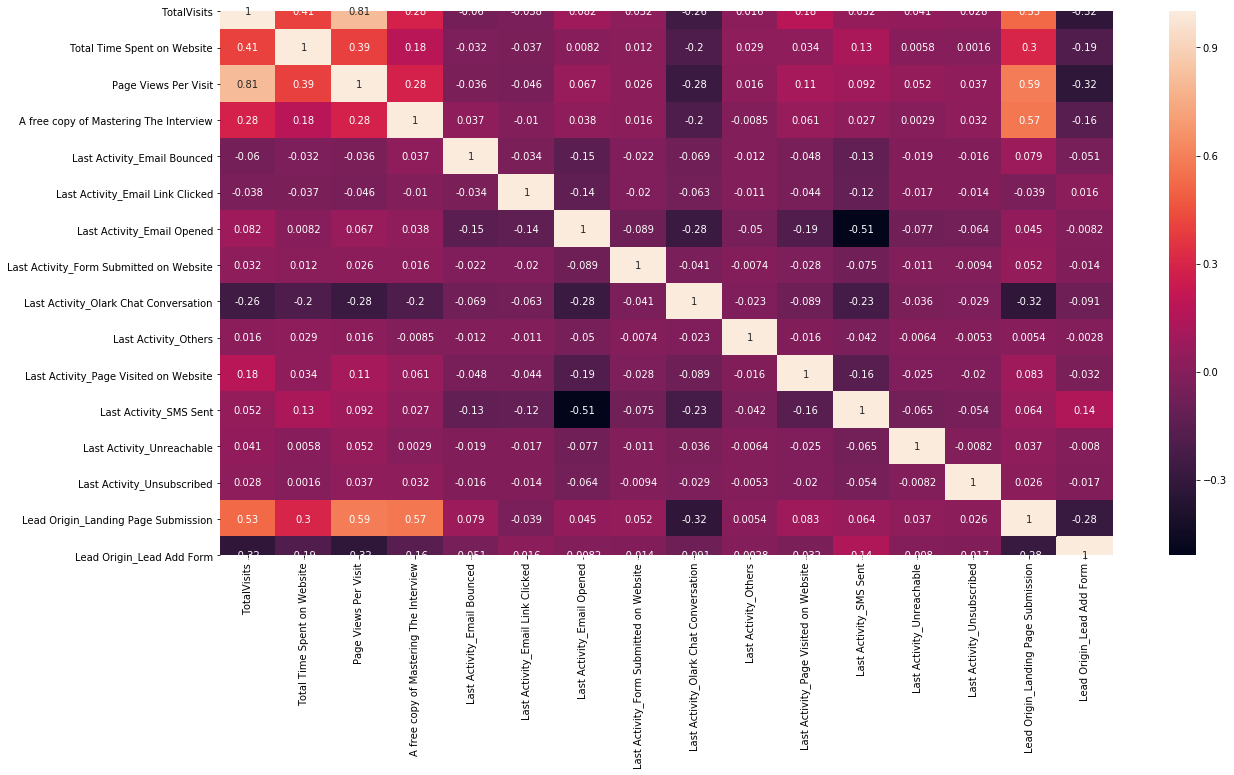

In [67]:
df1 = lead.loc[:,'TotalVisits':'Lead Origin_Lead Add Form']
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(df1.corr(), annot=True)

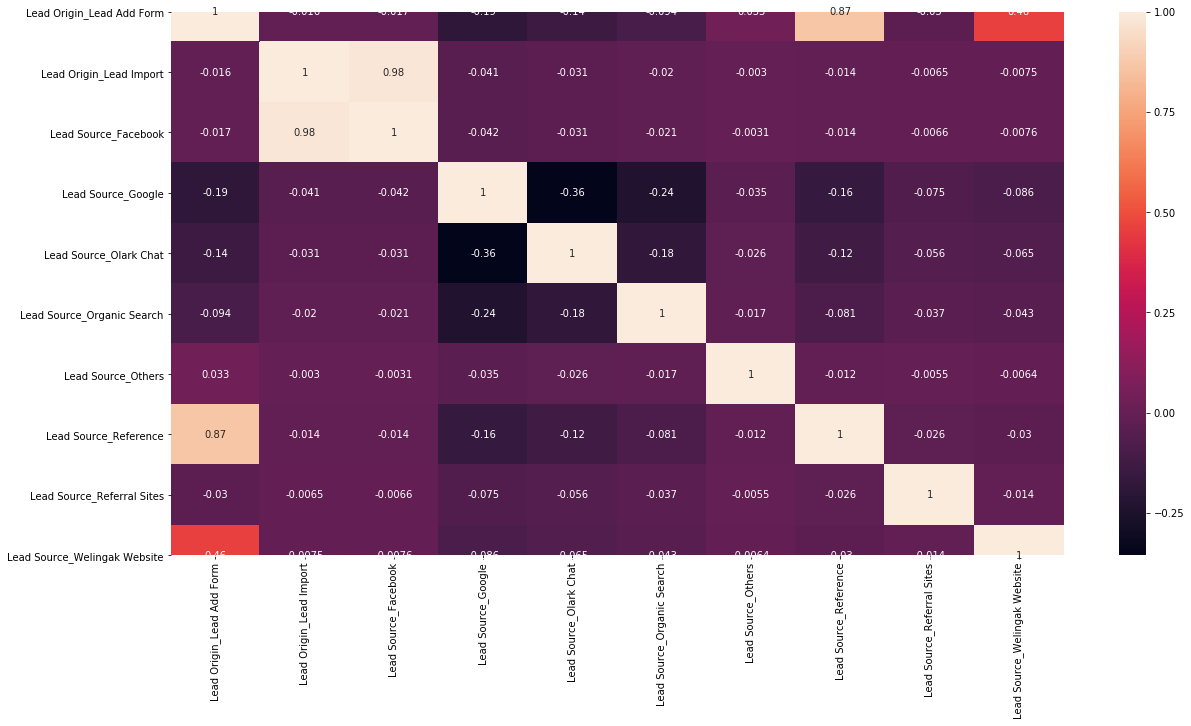

In [68]:
df2 = lead.loc[:,'Lead Origin_Lead Add Form':'Lead Source_Welingak Website']
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(df2.corr(), annot=True)

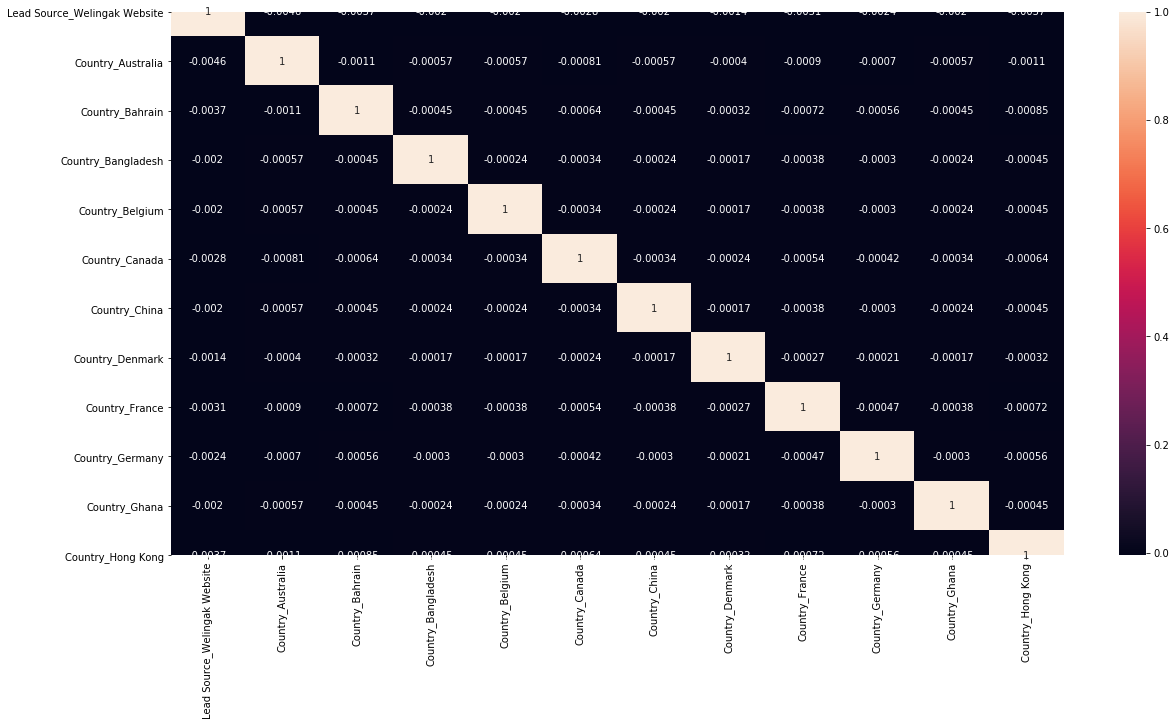

In [69]:
df3 = lead.loc[:,'Lead Source_Welingak Website':'Country_Hong Kong']
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(df3.corr(), annot=True)

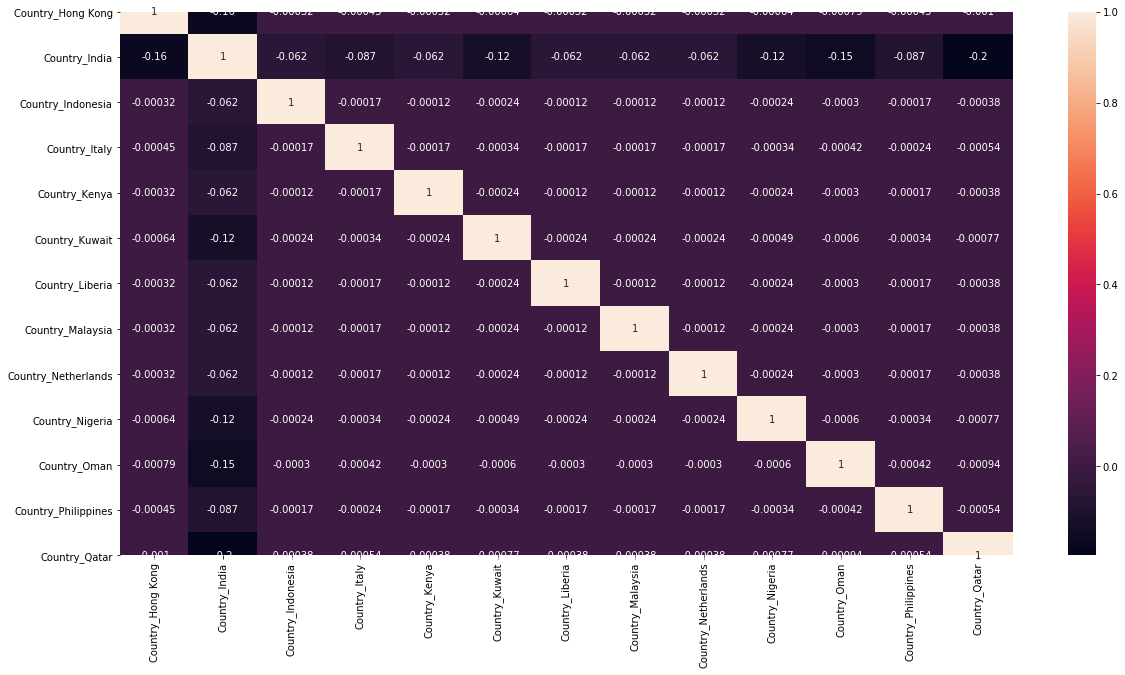

In [70]:
df4 = lead.loc[:,'Country_Hong Kong':'Country_Qatar']
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(df4.corr(), annot=True)

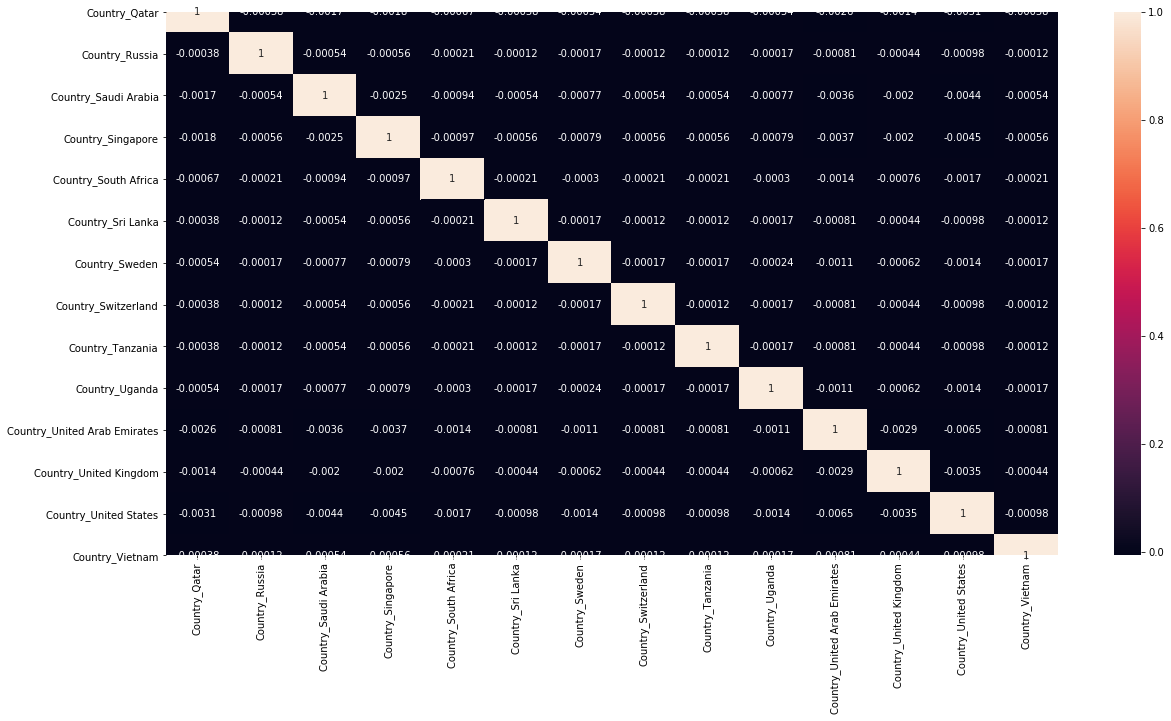

In [71]:
df5 = lead.loc[:,'Country_Qatar':'Country_Vietnam']
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(df5.corr(), annot=True)

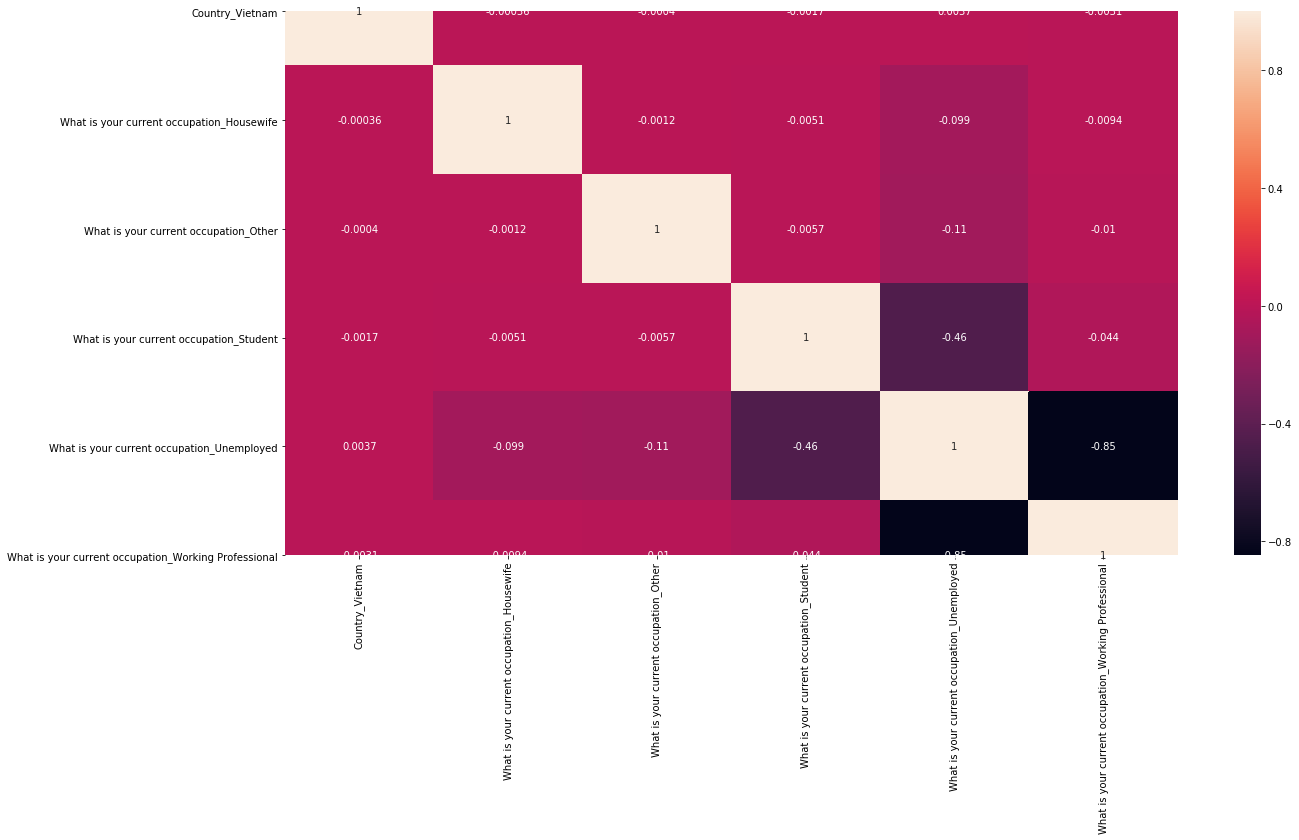

In [72]:
df6 = lead.loc[:,'Country_Vietnam':]
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(df6.corr(), annot=True)

### Running the First Training Model

In [73]:

import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res1 = logm1.fit()
(res1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5703
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jan 2020   Deviance:                          nan
Time:                        20:24:03   Pearson chi2:                 6.97e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.135e+15   6.75e+07   3.17e+07      0.000    2.14e+15    2.14e+15
TotalVisits                                           1.747e+14   1.69e+06   1.03e+08      0.000    1.75e+14    1.75e+14
Total Time Spent on Website                           8.941e+14   1.03e+06    8.7e+08      0.000    8.94e+14    8.94e+14
Page Views Per Visit                                 -1.965e+14   1.71e+06  -1.15e+08      0.000   -1.97e+14   -1.97e+14
A free copy of Mastering The Interview               -1.262e+14   2.89e+06  -4.37e+07      0.000   -1.26e+14   -1.26e+14
Last Activity_Email Bounced                           -6.93e+14   6.15e+06  -1.13e+08      0.000   -6.93e+14   -6.93e+14
Last Activity_Email Link Clicked                      -4.15e+14   6.49e+06  -6.39e+07      0.000   -4.15e+14   -4.15e+14
Last Activity_Email Opened                            3.328e+14    4.4e+06   7.56e+07      0.000    3.33e+14    3.33e+14
Last Activity_Form Submitted on Website              -3.553e+13   9.04e+06  -3.93e+06      0.000   -3.55e+13   -3.55e+13
Last Activity_Olark Chat Conversation                -8.333e+14   5.17e+06  -1.61e+08      0.000   -8.33e+14   -8.33e+14
Last Activity_Others                                 -3.899e+14    1.5e+07   -2.6e+07      0.000    -3.9e+14    -3.9e+14
Last Activity_Page Visited on Website                 4.776e+13    5.7e+06   8.38e+06      0.000    4.78e+13    4.78e+13
Last Activity_SMS Sent                               -5.688e+14   4.47e+06  -1.27e+08      0.000   -5.69e+14   -5.69e+14
Last Activity_Unreachable                             5.488e+14   1.01e+07   5.45e+07      0.000    5.49e+14    5.49e+14
Last Activity_Unsubscribed                            1.667e+14    1.1e+07   1.52e+07      0.000    1.67e+14    1.67e+14
Lead Origin_Landing Page Submission                  -1.092e+14   2.92e+06  -3.74e+07      0.000   -1.09e+14   -1.09e+14
Lead Origin_Lead Add Form                             5.368e+15   4.13e+07    1.3e+08      0.000    5.37e+15    5.37e+15
Lead Origin_Lead Import                               3.107e+15   7.17e+07   4.33e+07      0.000    3.11e+15    3.11e+15
Lead Source_Facebook                                 -1.722e+15      7e+07  -2.46e+07      0.000   -1.72e+15   -1.72e+15
Lead Source_Google                                    1.752e+14   3.11e+06   5.63e+07      0.000    1.75e+14    1.75e+14
Lead Source_Olark Chat                                1.564e+15   4.34e+06    3.6e+08      0.000    1.56e+15    1.56e+15
Lead Source_Organic Search                            6.281e+13   3.63e+06   1.73e+07      0.000    6.28e+13    6.28e+13
Lead Source_Others                                    1.29

In [74]:
# Feature Selection Using RFE:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
# Running RFE and selecting 20 features
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)
(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 38),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 14),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_R

In [75]:
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5743
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2416.4
Date:                Mon, 06 Jan 2020   Deviance:                       4832.8
Time:                        20:24:06   Pearson chi2:                 6.21e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7521      0.738     -1.019      0.308      -2.198       0.694
Total Time Spent on Website                              1.1275      0.042     26.706      0.000       1.045       1.210
Last Activity_Email Bounced                             -1.3478      0.361     -3.733      0.000      -2.055      -0.640
Last Activity_Email Opened                               0.8093      0.116      6.988      0.000       0.582       1.036
Last Activity_Olark Chat Conversation                   -0.8973      0.193     -4.659      0.000      -1.275      -0.520
Last Activity_Others                                     2.5732      0.615      4.187      0.000       1.369       3.778
Last Activity_SMS Sent                                   2.0407      0.119     17.088      0.000       1.807       2.275
Last Activity_Unreachable                                1.0837      0.358      3.031      0.002       0.383       1.784
Lead Origin_Landing Page Submission                     -0.3493      0.094     -3.732      0.000      -0.533      -0.166
Lead Origin_Lead Add Form                               26.3745    7.3e+04      0.000      1.000   -1.43e+05    1.43e+05
Lead Origin_Lead Import                                  0.7788      0.543      1.434      0.152      -0.286       1.843
Lead Source_Olark Chat                                   1.1133      0.122      9.098      0.000       0.874       1.353
Lead Source_Reference                                  -22.4635    7.3e+04     -0.000      1.000   -1.43e+05    1.43e+05
Lead Source_Welingak Website                            -0.2075   7.41e+04   -2.8e-06      1.000   -1.45e+05    1.45e+05
Country_Netherlands                                    -26.0562   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Country_Qatar                                          -24.2158   3.99e+04     -0.001      1.000   -7.82e+04    7.82e+04
Country_United Arab Emirates                             0.3246      0.420      0.773      0.440      -0.499       1.148
What is your current occupation_Housewife               23.8903   5.24e+04      0.000      1.000   -1.03e+05    1.03e+05
What is your current occupation_Student                 -0.8452      0.767     -1.102      0.270      -2.348       0.657
What is your current occupation_Unemployed              -1.2344      0.733     -1.685      0.092      -2.670       0.201
What is your current occupation_Working Professional     1.4168      0.755      1.876      0.061      -0.063       2.897
========================================================================================================================
"""

In [76]:
# Calculate the VIFs for the new model,
# VIF is also part of selecting variables what all features we need to keep to get the best model
# A feature having greater than 5 vif, can not be part of our model as it shows that it is correlated with some other
# variable and redundant, so we need to remove these variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
(vif)

,Features,VIF
0,const,488.09
9,Lead Origin_Lead Add Form,124.86
12,Lead Source_Reference,97.37
19,What is your current occupation_Unemployed,42.94
20,What is your current occupation_Working Profes...,33.35
13,Lead Source_Welingak Website,31.50
18,What is your current occupation_Student,11.93
3,Last Activity_Email Opened,2.13
6,Last Activity_SMS Sent,2.09
11,Lead Source_Olark Chat,2.00


Below action should be performd, If created model has - - High p-value and High VIF -> needs to be removed
first - High p-value and Low VIF -> needs to be removed first column having high p-value - Low p-value and High
VIF -> needs to be removed first other column having high p-value, then check for the VIF - Low p-value and
Low VIF -> should not be removed

In [77]:

# Removing 'Lead Origin_Lead Add Form' as it is having high p-value and VIF.
# Dropping the high p value first
col = col.drop('Lead Origin_Lead Add Form',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5744
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2422.2
Date:                Mon, 06 Jan 2020   Deviance:                       4844.3
Time:                        20:24:07   Pearson chi2:                 6.21e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7386      0.737     -1.002      0.316      -2.183       0.706
Total Time Spent on Website                              1.1219      0.042     26.638      0.000       1.039       1.204
Last Activity_Email Bounced                             -1.3454      0.361     -3.729      0.000      -2.053      -0.638
Last Activity_Email Opened                               0.8146      0.116      7.043      0.000       0.588       1.041
Last Activity_Olark Chat Conversation                   -0.8971      0.192     -4.661      0.000      -1.274      -0.520
Last Activity_Others                                     2.5686      0.614      4.184      0.000       1.366       3.772
Last Activity_SMS Sent                                   2.0420      0.119     17.118      0.000       1.808       2.276
Last Activity_Unreachable                                1.0825      0.357      3.031      0.002       0.383       1.782
Lead Origin_Landing Page Submission                     -0.3644      0.093     -3.904      0.000      -0.547      -0.181
Lead Origin_Lead Import                                  0.7545      0.543      1.390      0.165      -0.310       1.819
Lead Source_Olark Chat                                   1.0910      0.122      8.946      0.000       0.852       1.330
Lead Source_Reference                                    3.8881      0.260     14.928      0.000       3.378       4.399
Lead Source_Welingak Website                            26.1444   1.27e+04      0.002      0.998   -2.48e+04    2.49e+04
Country_Netherlands                                    -26.0488   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Country_Qatar                                          -24.2119   3.99e+04     -0.001      1.000   -7.83e+04    7.83e+04
Country_United Arab Emirates                             0.3217      0.420      0.767      0.443      -0.501       1.144
What is your current occupation_Housewife               23.8910   5.24e+04      0.000      1.000   -1.03e+05    1.03e+05
What is your current occupation_Student                 -0.8452      0.766     -1.103      0.270      -2.347       0.656
What is your current occupation_Unemployed              -1.2325      0.732     -1.684      0.092      -2.667       0.202
What is your current occupation_Working Professional     1.4148      0.755      1.875      0.061      -0.064       2.894
========================================================================================================================
"""

In [78]:
# Removing 'Country_Netherlands' as it is having high p-value.
col = col.drop('Country_Netherlands',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5745
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2423.8
Date:                Mon, 06 Jan 2020   Deviance:                       4847.7
Time:                        20:24:07   Pearson chi2:                 6.20e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7359      0.737     -0.999      0.318      -2.180       0.708
Total Time Spent on Website                              1.1201      0.042     26.619      0.000       1.038       1.203
Last Activity_Email Bounced                             -1.3452      0.361     -3.729      0.000      -2.052      -0.638
Last Activity_Email Opened                               0.8142      0.116      7.042      0.000       0.588       1.041
Last Activity_Olark Chat Conversation                   -0.8980      0.192     -4.667      0.000      -1.275      -0.521
Last Activity_Others                                     2.5677      0.614      4.184      0.000       1.365       3.770
Last Activity_SMS Sent                                   2.0384      0.119     17.097      0.000       1.805       2.272
Last Activity_Unreachable                                1.0820      0.357      3.031      0.002       0.382       1.782
Lead Origin_Landing Page Submission                     -0.3660      0.093     -3.923      0.000      -0.549      -0.183
Lead Origin_Lead Import                                  0.7518      0.543      1.385      0.166      -0.312       1.816
Lead Source_Olark Chat                                   1.0888      0.122      8.933      0.000       0.850       1.328
Lead Source_Reference                                    3.8855      0.260     14.920      0.000       3.375       4.396
Lead Source_Welingak Website                            26.1424   1.27e+04      0.002      0.998   -2.48e+04    2.49e+04
Country_Qatar                                          -24.2086      4e+04     -0.001      1.000   -7.83e+04    7.83e+04
Country_United Arab Emirates                             0.3224      0.419      0.769      0.442      -0.500       1.144
What is your current occupation_Housewife               23.8909   5.24e+04      0.000      1.000   -1.03e+05    1.03e+05
What is your current occupation_Student                 -0.8452      0.766     -1.104      0.270      -2.346       0.656
What is your current occupation_Unemployed              -1.2332      0.732     -1.685      0.092      -2.667       0.201
What is your current occupation_Working Professional     1.4147      0.754      1.875      0.061      -0.064       2.893
========================================================================================================================
"""

In [79]:

# Removing 'Country_Qatar' as it is having high p-value.
col = col.drop('Country_Qatar',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5746
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2427.5
Date:                Mon, 06 Jan 2020   Deviance:                       4855.0
Time:                        20:24:07   Pearson chi2:                 6.21e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7290      0.737     -0.990      0.322      -2.173       0.715
Total Time Spent on Website                              1.1182      0.042     26.619      0.000       1.036       1.201
Last Activity_Email Bounced                             -1.3451      0.361     -3.728      0.000      -2.052      -0.638
Last Activity_Email Opened                               0.8091      0.116      7.000      0.000       0.583       1.036
Last Activity_Olark Chat Conversation                   -0.9008      0.192     -4.683      0.000      -1.278      -0.524
Last Activity_Others                                     2.5669      0.614      4.184      0.000       1.364       3.769
Last Activity_SMS Sent                                   2.0351      0.119     17.078      0.000       1.802       2.269
Last Activity_Unreachable                                1.0822      0.357      3.032      0.002       0.383       1.782
Lead Origin_Landing Page Submission                     -0.3704      0.093     -3.973      0.000      -0.553      -0.188
Lead Origin_Lead Import                                  0.7513      0.543      1.384      0.166      -0.313       1.815
Lead Source_Olark Chat                                   1.0877      0.122      8.929      0.000       0.849       1.326
Lead Source_Reference                                    3.8840      0.260     14.917      0.000       3.374       4.394
Lead Source_Welingak Website                            26.1406   1.27e+04      0.002      0.998   -2.48e+04    2.49e+04
Country_United Arab Emirates                             0.3262      0.419      0.778      0.437      -0.496       1.148
What is your current occupation_Housewife               23.8918   5.24e+04      0.000      1.000   -1.03e+05    1.03e+05
What is your current occupation_Student                 -0.8455      0.765     -1.105      0.269      -2.346       0.655
What is your current occupation_Unemployed              -1.2368      0.731     -1.691      0.091      -2.670       0.197
What is your current occupation_Working Professional     1.4142      0.754      1.875      0.061      -0.064       2.892
========================================================================================================================
"""

In [80]:
# Removing 'What is your current occupation_Housewife' as it is having high p-value.
col = col.drop('What is your current occupation_Housewife',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5747
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2429.2
Date:                Mon, 06 Jan 2020   Deviance:                       4858.4
Time:                        20:24:07   Pearson chi2:                 6.21e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1078      0.659     -0.164      0.870      -1.399       1.184
Total Time Spent on Website                              1.1180      0.042     26.616      0.000       1.036       1.200
Last Activity_Email Bounced                             -1.3451      0.361     -3.729      0.000      -2.052      -0.638
Last Activity_Email Opened                               0.8093      0.115      7.008      0.000       0.583       1.036
Last Activity_Olark Chat Conversation                   -0.8999      0.192     -4.678      0.000      -1.277      -0.523
Last Activity_Others                                     2.5669      0.613      4.184      0.000       1.364       3.769
Last Activity_SMS Sent                                   2.0349      0.119     17.085      0.000       1.801       2.268
Last Activity_Unreachable                                1.0784      0.358      3.015      0.003       0.377       1.779
Lead Origin_Landing Page Submission                     -0.3684      0.093     -3.952      0.000      -0.551      -0.186
Lead Origin_Lead Import                                  0.7521      0.543      1.385      0.166      -0.312       1.816
Lead Source_Olark Chat                                   1.0876      0.122      8.927      0.000       0.849       1.326
Lead Source_Reference                                    3.8852      0.260     14.923      0.000       3.375       4.395
Lead Source_Welingak Website                            26.1416   1.27e+04      0.002      0.998   -2.48e+04    2.49e+04
Country_United Arab Emirates                             0.3256      0.419      0.777      0.437      -0.496       1.148
What is your current occupation_Student                 -1.4679      0.691     -2.124      0.034      -2.823      -0.113
What is your current occupation_Unemployed              -1.8590      0.654     -2.845      0.004      -3.140      -0.578
What is your current occupation_Working Professional     0.7917      0.678      1.167      0.243      -0.538       2.121
========================================================================================================================
"""

In [81]:
# Removing 'Lead Source_Welingak Website' as it is having high p-value.
col = col.drop('Lead Source_Welingak Website',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5748
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.2
Date:                Mon, 06 Jan 2020   Deviance:                       5116.4
Time:                        20:24:08   Pearson chi2:                 6.20e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2351      0.651      0.361      0.718      -1.040       1.510
Total Time Spent on Website                              1.0057      0.040     25.072      0.000       0.927       1.084
Last Activity_Email Bounced                             -1.2215      0.343     -3.565      0.000      -1.893      -0.550
Last Activity_Email Opened                               0.8434      0.112      7.536      0.000       0.624       1.063
Last Activity_Olark Chat Conversation                   -0.9139      0.188     -4.857      0.000      -1.283      -0.545
Last Activity_Others                                     2.4550      0.602      4.081      0.000       1.276       3.634
Last Activity_SMS Sent                                   2.1104      0.116     18.272      0.000       1.884       2.337
Last Activity_Unreachable                                1.0290      0.350      2.936      0.003       0.342       1.716
Lead Origin_Landing Page Submission                     -0.7260      0.088     -8.263      0.000      -0.898      -0.554
Lead Origin_Lead Import                                  0.2502      0.540      0.463      0.643      -0.808       1.309
Lead Source_Olark Chat                                   0.5984      0.113      5.297      0.000       0.377       0.820
Lead Source_Reference                                    3.3943      0.256     13.233      0.000       2.892       3.897
Country_United Arab Emirates                             0.2714      0.411      0.660      0.510      -0.535       1.078
What is your current occupation_Student                 -1.4423      0.683     -2.111      0.035      -2.781      -0.103
What is your current occupation_Unemployed              -1.8330      0.646     -2.836      0.005      -3.100      -0.566
What is your current occupation_Working Professional     0.7501      0.671      1.118      0.264      -0.565       2.066
========================================================================================================================
"""

In [82]:
# Removing 'Lead Origin_Lead Import' as it is having high p-value.
col = col.drop('Lead Origin_Lead Import',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5749
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.3
Date:                Mon, 06 Jan 2020   Deviance:                       5116.6
Time:                        20:24:08   Pearson chi2:                 6.20e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2381      0.651      0.366      0.714      -1.037       1.513
Total Time Spent on Website                              1.0043      0.040     25.113      0.000       0.926       1.083
Last Activity_Email Bounced                             -1.2211      0.343     -3.564      0.000      -1.893      -0.550
Last Activity_Email Opened                               0.8454      0.112      7.560      0.000       0.626       1.065
Last Activity_Olark Chat Conversation                   -0.9138      0.188     -4.857      0.000      -1.283      -0.545
Last Activity_Others                                     2.4545      0.602      4.080      0.000       1.275       3.633
Last Activity_SMS Sent                                   2.1109      0.115     18.279      0.000       1.885       2.337
Last Activity_Unreachable                                1.0290      0.350      2.937      0.003       0.342       1.716
Lead Origin_Landing Page Submission                     -0.7299      0.087     -8.348      0.000      -0.901      -0.559
Lead Source_Olark Chat                                   0.5929      0.112      5.280      0.000       0.373       0.813
Lead Source_Reference                                    3.3885      0.256     13.228      0.000       2.886       3.891
Country_United Arab Emirates                             0.2704      0.411      0.657      0.511      -0.536       1.077
What is your current occupation_Student                 -1.4424      0.683     -2.111      0.035      -2.781      -0.103
What is your current occupation_Unemployed              -1.8326      0.646     -2.836      0.005      -3.099      -0.566
What is your current occupation_Working Professional     0.7531      0.671      1.122      0.262      -0.562       2.068
========================================================================================================================
"""

In [83]:
# Removing 'Country_United Arab Emirates' as it is having high p-value.
col = col.drop('Country_United Arab Emirates',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5750
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.5
Date:                Mon, 06 Jan 2020   Deviance:                       5117.0
Time:                        20:24:08   Pearson chi2:                 6.16e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2374      0.651      0.365      0.715      -1.038       1.512
Total Time Spent on Website                              1.0037      0.040     25.108      0.000       0.925       1.082
Last Activity_Email Bounced                             -1.2246      0.343     -3.575      0.000      -1.896      -0.553
Last Activity_Email Opened                               0.8443      0.112      7.551      0.000       0.625       1.063
Last Activity_Olark Chat Conversation                   -0.9160      0.188     -4.869      0.000      -1.285      -0.547
Last Activity_Others                                     2.4509      0.601      4.075      0.000       1.272       3.630
Last Activity_SMS Sent                                   2.1088      0.115     18.270      0.000       1.883       2.335
Last Activity_Unreachable                                1.0252      0.350      2.927      0.003       0.339       1.712
Lead Origin_Landing Page Submission                     -0.7275      0.087     -8.329      0.000      -0.899      -0.556
Lead Source_Olark Chat                                   0.5925      0.112      5.277      0.000       0.372       0.813
Lead Source_Reference                                    3.3869      0.256     13.222      0.000       2.885       3.889
What is your current occupation_Student                 -1.4415      0.683     -2.110      0.035      -2.780      -0.103
What is your current occupation_Unemployed              -1.8297      0.646     -2.832      0.005      -3.096      -0.563
What is your current occupation_Working Professional     0.7585      0.671      1.131      0.258      -0.557       2.074
========================================================================================================================
"""

In [84]:
# Removing 'What is your current occupation_Working Professional' as it is having high p-value.
col = col.drop('What is your current occupation_Working Professional',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
(res2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5751
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.1
Date:                Mon, 06 Jan 2020   Deviance:                       5118.2
Time:                        20:24:08   Pearson chi2:                 6.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.9414      0.208      4.531      0.000       0.534       1.349
Total Time Spent on Website                    1.0032      0.040     25.099      0.000       0.925       1.082
Last Activity_Email Bounced                   -1.2155      0.342     -3.553      0.000      -1.886      -0.545
Last Activity_Email Opened                     0.8478      0.112      7.579      0.000       0.629       1.067
Last Activity_Olark Chat Conversation         -0.9105      0.188     -4.843      0.000      -1.279      -0.542
Last Activity_Others                           2.4561      0.601      4.086      0.000       1.278       3.634
Last Activity_SMS Sent                         2.1135      0.115     18.313      0.000       1.887       2.340
Last Activity_Unreachable                      1.0281      0.351      2.933      0.003       0.341       1.715
Lead Origin_Landing Page Submission           -0.7273      0.087     -8.326      0.000      -0.898      -0.556
Lead Source_Olark Chat                         0.5922      0.112      5.275      0.000       0.372       0.812
Lead Source_Reference                          3.3881      0.256     13.228      0.000       2.886       3.890
What is your current occupation_Student       -2.1491      0.288     -7.474      0.000      -2.713      -1.586
What is your current occupation_Unemployed    -2.5374      0.183    -13.854      0.000      -2.896      -2.178
==============================================================================================================
"""

In [85]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
(vif)

,Features,VIF
0,const,24.63
3,Last Activity_Email Opened,2.11
6,Last Activity_SMS Sent,2.06
9,Lead Source_Olark Chat,1.89
4,Last Activity_Olark Chat Conversation,1.79
8,Lead Origin_Landing Page Submission,1.66
12,What is your current occupation_Unemployed,1.41
10,Lead Source_Reference,1.34
11,What is your current occupation_Student,1.32
1,Total Time Spent on Website,1.29


In [86]:
y_train_pred = res2.predict(X_train_sm).values.reshape(-1)
print(y_train_pred[:10])

[0.99623579 0.08170775 0.06060571 0.5009667  0.04274439 0.46684416
 0.76379102 0.67829177 0.0761966  0.2649064 ]


In [87]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
0,1,0.996236,5792
1,0,0.081708,8192
2,0,0.060606,2843
3,0,0.500967,8964
4,0,0.042744,8457


In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
0,1,0.996236,5792,1
1,0,0.081708,8192,0
2,0,0.060606,2843,0
3,0,0.500967,8964,1
4,0,0.042744,8457,0


In [89]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3156  431]
 [ 749 1428]]


In [90]:
# Check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7952810548230396


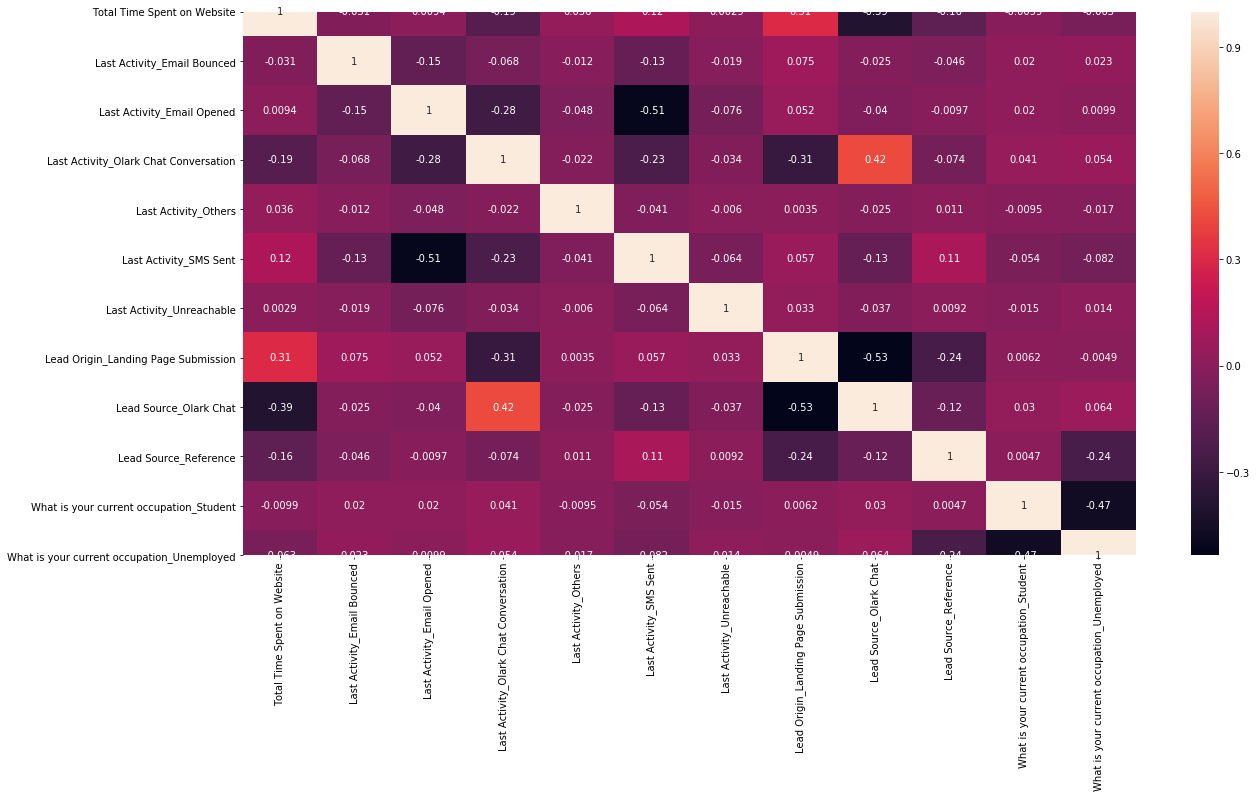

In [91]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

In [92]:
# Metrics beyond simply accuracy
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Sensitivity of the logistic regression model
print(TP / float(TP+FN))

0.6559485530546624


In [94]:
# Specificity fo the logistic regression model
print(TN / float(TN+FP))

0.8798438806802342


In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12015611931976582


In [96]:
# positive predictive value
print (TP / float(TP+FP))

0.7681549220010758


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8081946222791293


## ROC CURVE:

In [98]:
# An ROC shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
# The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
# The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

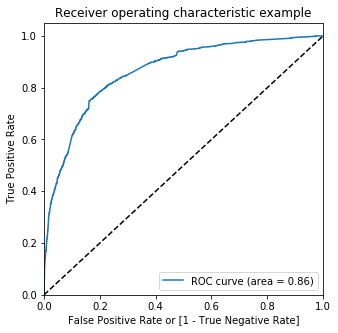

None


In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
print(draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob))

### Finding Optimal Cutoff Point

In [100]:
# The probability point that gives us a balanced sensitivity and specificity point.
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.996236,5792,1,1,1,1,1,1,1,1,1,1,1
1,0,0.081708,8192,0,1,0,0,0,0,0,0,0,0,0
2,0,0.060606,2843,0,1,0,0,0,0,0,0,0,0,0
3,0,0.500967,8964,1,1,1,1,1,1,1,0,0,0,0
4,0,0.042744,8457,0,1,0,0,0,0,0,0,0,0,0


In [101]:
# Calculate Probability, accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1

    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377689,1.000000,0.000000
0.1,0.1,0.584837,0.969683,0.351268
0.2,0.2,0.700729,0.914561,0.570951
0.3,0.3,0.774462,0.825907,0.743239
0.4,0.4,0.802047,0.756086,0.829941
0.5,0.5,0.795281,0.655949,0.879844
0.6,0.6,0.774983,0.527331,0.925286
0.7,0.7,0.762491,0.454295,0.949540
0.8,0.8,0.743234,0.363344,0.973794
0.9,0.9,0.694136,0.205328,0.990800


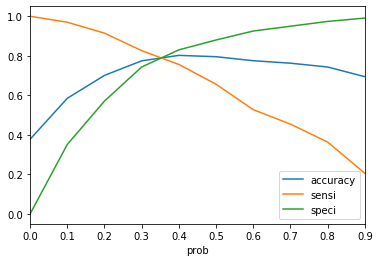

In [102]:
# Plotting the above points for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.35 is the optimum point

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.996236,5792,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.081708,8192,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.060606,2843,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.500967,8964,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.042744,8457,0,1,0,0,0,0,0,0,0,0,0,0


In [104]:
# Check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted))

0.7916377515614157


In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)
print(confusion2)

[[2842  745]
 [ 456 1721]]


In [106]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Sensitivity of the logistic regression model
print(TP / float(TP+FN))

# Specificity fo the logistic regression model
print(TN / float(TN+FP))


# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))


# positive predictive value
print (TP / float(TP+FP))


# Negative predictive value
print (TN / float(TN+ FN))

0.7905374368396877
0.7923055478115417
0.20769445218845833
0.6978913219789132
0.8617343844754397


### Precision and Recall

In [108]:

# Precision
# TP / TP + FP
print(confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))


# Recall
# TP/TP +FN
print(confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

0.6978913219789132
0.7905374368396877


In [109]:
# Rechecking Precision and Recall score using Sklearn
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))
print(recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7681549220010758
0.6559485530546624


In [110]:
# Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 5759    0
 5760    0
 5761    0
 5762    0
 5763    1
 Name: Conversion, Length: 5764, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 5759    0
 5760    0
 5761    0
 5762    0
 5763    0
 Name: predicted, Length: 5764, dtype: int64)

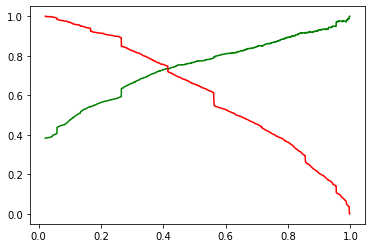

In [111]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The intersection is at 0.377. The Cut-off point seems to be fair enough for the model.

## Making predictions on the test set

In [112]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,...,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7509,-1.237208,-0.861871,-1.237696,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2465,0.201611,-0.747715,0.582792,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2132,-1.237208,-0.861871,-1.237696,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1409,-0.277995,-0.858189,-0.024037,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
785,0.201611,0.458288,-0.327452,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,What is your current occupation_Student,What is your current occupation_Unemployed
7509,-0.861871,0,1,0,0,0,0,0,1,0,0,1
2465,-0.747715,0,1,0,0,0,0,1,0,0,0,1
2132,-0.861871,0,1,0,0,0,0,0,0,1,0,0
1409,-0.858189,0,0,0,0,1,0,1,0,0,0,1
785,0.458288,0,1,0,0,0,0,0,0,0,0,0


In [114]:
#Adding constant
X_test_sm = sm.add_constant(X_test)
#Making prediction
y_test_pred = res2.predict(X_test_sm)
y_test_pred[:10]

7509    0.264906
2465    0.097480
2132    0.986780
1409    0.255281
785     0.904560
6416    0.058473
1431    0.080289
135     0.463922
8737    0.067463
1951    0.757563
dtype: float64

In [115]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)


In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [117]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,7509,0.264906
1,0,2465,0.097480
2,1,2132,0.986780
3,0,1409,0.255281
4,1,785,0.904560


In [118]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)


In [119]:
print(y_pred_final.shape)
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

(2471, 3)


,LeadID,Converted,Conversion_Prob,final_predicted
0,7509,0,0.264906,0
1,2465,0,0.097480,0
2,2132,1,0.986780,1
3,1409,0,0.255281,0
4,785,1,0.904560,1


In [120]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print(accuracy_score)

0.7911776608660461


In [121]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1254  330]
 [ 186  701]]


In [122]:
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [123]:
# Sensitivity of the logistic regression model
print(TP / float(TP+FN))

# Specificity fo the logistic regression model
print(TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# positive predictive value
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.790304396843292
0.7916666666666666
0.20833333333333334
0.6799224054316197
0.8708333333333333


In [124]:
#precision
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.6799224054316197

In [125]:
#recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.790304396843292

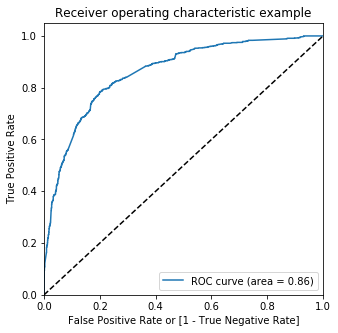

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [127]:
#lead score for customer in the range 0-100
y_test_pred = y_test_pred * 100
y_test_pred[:10]

7509    26.490640
2465     9.747987
2132    98.678004
1409    25.528068
785     90.455999
6416     5.847328
1431     8.028940
135     46.392152
8737     6.746321
1951    75.756282
dtype: float64

In [129]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_var = res2.params[1:]
new_var

Total Time Spent on Website                   1.00
Last Activity_Email Bounced                  -1.22
Last Activity_Email Opened                    0.85
Last Activity_Olark Chat Conversation        -0.91
Last Activity_Others                          2.46
Last Activity_SMS Sent                        2.11
Last Activity_Unreachable                     1.03
Lead Origin_Landing Page Submission          -0.73
Lead Source_Olark Chat                        0.59
Lead Source_Reference                         3.39
What is your current occupation_Student      -2.15
What is your current occupation_Unemployed   -2.54
dtype: float64

In [134]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_var
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values()

What is your current occupation_Unemployed   -74.89
What is your current occupation_Student      -63.43
Last Activity_Email Bounced                  -35.87
Last Activity_Olark Chat Conversation        -26.87
Lead Origin_Landing Page Submission          -21.46
Lead Source_Olark Chat                        17.48
Last Activity_Email Opened                    25.02
Total Time Spent on Website                   29.61
Last Activity_Unreachable                     30.34
Last Activity_SMS Sent                        62.38
Last Activity_Others                          72.49
Lead Source_Reference                        100.00
dtype: float64

In [142]:
#Sorting the feature variables based on their relative coefficient values
sort = np.argsort(feature_importance,kind='quicksort',order='list of str')
sort

Total Time Spent on Website                   11
Last Activity_Email Bounced                   10
Last Activity_Email Opened                     1
Last Activity_Olark Chat Conversation          3
Last Activity_Others                           7
Last Activity_SMS Sent                         8
Last Activity_Unreachable                      2
Lead Origin_Landing Page Submission            0
Lead Source_Olark Chat                         6
Lead Source_Reference                          5
What is your current occupation_Student        4
What is your current occupation_Unemployed     9
dtype: int64

This tells us that the Model we have build is Good. This Model will give around 80% lead conversion rate. The by giving us the HOT leads needed for improving the list of potential customers to our Institution.